# **Import Libraries and modules**

In [12]:
# https://keras.io/
import datetime
!pip install -q keras
import keras
print(datetime.datetime.now())

2019-06-23 03:05:02.338079


In [13]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
#from keras.layers.merge import concatenate

from keras.datasets import mnist
print(datetime.datetime.now())

2019-06-23 03:05:04.489375


### Load pre-shuffled MNIST data into train and test sets

In [14]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(datetime.datetime.now())

2019-06-23 03:05:09.597226


(60000, 28, 28)
2019-06-23 03:05:11.385269


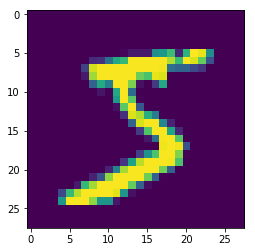

In [15]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])
print(datetime.datetime.now())

In [16]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
print(datetime.datetime.now())

2019-06-23 03:05:18.131575


In [18]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(datetime.datetime.now())

2019-06-23 03:05:24.844085


In [19]:
y_train[:10]
print(datetime.datetime.now())

2019-06-23 03:05:28.950762


In [20]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(datetime.datetime.now())

2019-06-23 03:05:30.817675


In [21]:
Y_train[:10]
print(datetime.datetime.now())

2019-06-23 03:05:32.883013


In [76]:
## MAIN BLOCK

from keras.layers import Activation
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D, Conv1D ,SeparableConv2D ,DepthwiseConv2D ,Conv3D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.layers import Lambda
x1 = Input(shape=(28,28,1))
x2 = Conv2D(32, 3, 3 , border_mode='same',activation='relu')(x1)
add1 = concatenate([x1,x2])
x3 = Conv2D(32, 3, 3 , border_mode='same',activation='relu')(add1)
add2 = concatenate([x1,x2,x3])


x4 = MaxPooling2D(pool_size=(2, 2))(add2)
#x4 = Convolution2D(16, (1,1), activation='relu')(x4)

x5 = Conv2D(32, 3, 3 , border_mode='same',activation='relu')(x4)
add3 = concatenate([x4,x5])
x6 = Conv2D(32, 3, 3 , border_mode='same',activation='relu')(add3)
add4 = concatenate([x4,x5,x6])
x7 = Conv2D(32, 3, 3 , border_mode='same',activation='relu')(add4)
add5= concatenate([x5,x6,x7])

x8 = MaxPooling2D(pool_size=(2, 2))(add5)
#x8 = Convolution2D(16, (1,1), activation='relu')(x8)

x9 = Conv2D(32, 3, 3 , border_mode='same',activation='relu')(x8)
add6 = concatenate([x8,x9])
x10 =  Conv2D(32, 3, 3 , border_mode='same',activation='relu')(add6)
add7 = concatenate([x8,x9,x10])
x11 =  Conv2D(80, 3, 3 , border_mode='same',activation='relu')(add7)
final = Conv2D(10, 7, 7,activation='relu')(x11)
final1 = Activation('softmax')(final)
output1=Flatten()(final1)
output=output1



print(datetime.datetime.now())

2019-06-23 04:05:00.392415


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
/usr/local/lib/python3.6/dist-packages/ip

In [77]:
model=Sequential()
model=Model(inputs=[x1], outputs=[output])
model.summary()

print(datetime.datetime.now())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_18 (InputLayer)           (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_159 (Conv2D)             (None, 28, 28, 32)   320         input_18[0][0]                   
__________________________________________________________________________________________________
concatenate_120 (Concatenate)   (None, 28, 28, 33)   0           input_18[0][0]                   
                                                                 conv2d_159[0][0]                 
__________________________________________________________________________________________________
conv2d_160 (Conv2D)             (None, 28, 28, 32)   9536        concatenate_120[0][0]            
__________

In [78]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
print(datetime.datetime.now())

2019-06-23 04:05:11.298610


In [79]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)
print(datetime.datetime.now())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 18s 299us/step - loss: 1.4971 - acc: 0.3902
Epoch 2/10
60000/60000 [==============================] - 16s 270us/step - loss: 1.2795 - acc: 0.4617
Epoch 3/10
60000/60000 [==============================] - 16s 263us/step - loss: 1.1733 - acc: 0.5024
Epoch 4/10
60000/60000 [==============================] - 16s 261us/step - loss: 0.9486 - acc: 0.5986
Epoch 5/10
60000/60000 [==============================] - 16s 261us/step - loss: 0.9327 - acc: 0.6024
Epoch 6/10
60000/60000 [==============================] - 16s 261us/step - loss: 0.9267 - acc: 0.6031
Epoch 7/10
60000/60000 [==============================] - 16s 262us/step - loss: 0.9256 - acc: 0.6034
Epoch 8/10
60000/60000 [==============================] - 16s 261us/step - loss: 0.9215 - acc: 0.6041
Epoch 9/10
60000/60000 [==============================] - 16s 263us/step - loss: 0.9197 - acc: 0.6047
Epoch 10/10
60000/60000 [==============================] - 16s 261us/step - loss: 

In [80]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(datetime.datetime.now())

2019-06-23 04:08:19.027502


In [81]:
print(score)
print(datetime.datetime.now())

[0.9325510641098023, 0.6038]
2019-06-23 04:08:21.729616
